In [11]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Import necessary libraries
import pandas as pd

# Update the file path to point to your Google Drive
cars_data_path = '/content/drive/My Drive/Colab Notebooks/OLX_cars_dataset00.csv'

# Load the dataset
cars_data = pd.read_csv(cars_data_path)

# Display the first few rows of the dataset
print(cars_data.head())

# Display the columns to confirm their presence
print(cars_data.columns)

        Ad ID                               Car Name      Make  Model  Year  \
0  1079071571           fresh import Passo 2021model    Toyota  Passo  2021   
1  1080125520                            Suzuki ravi    Suzuki   Ravi  2018   
2  1080748789  Suzuki bolan 2015 contact 03112271054    Suzuki  Bolan  2015   
3  1076081635                     Diahatsu Move 2013  Daihatsu   Move  2013   
4  1080812928     Suzuki Swift DLX 2011 miner tuchap    Suzuki  Swift  2011   

   KM's driven    Price    Fuel Registration city Car documents  Assembly  \
0        54000  4190000  Petrol      Unregistered      Original  Imported   
1        95000  1300000  Petrol           Karachi      Original     Local   
2        50000   800000  Petrol           Karachi      Original     Local   
3        94000  2155000  Petrol            Lahore      Original  Imported   
4       126544  1440000  Petrol           Karachi      Original     Local   

  Transmission Condition            Seller Location  \
0    Au

In [33]:
# Preprocessing OLX data
cars_data = cars_data.drop_duplicates()

# Calculate the age of cars
cars_data['age'] = 2025 - cars_data['Year']

# Drop unnecessary columns if they exist
columns_to_drop = ['Ad ID', 'Images URL\'s', 'Car Profile']
cars_data = cars_data.drop(columns=[col for col in columns_to_drop if col in cars_data.columns])

# Shuffle the data to avoid bias
cars_data = cars_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check if 'Car Features' column exists before processing it
if 'Car Features' in cars_data.columns:
    # Extract relevant features from 'Car Features' column
    car_features = cars_data['Car Features'].str.get_dummies(sep=',')
    cars_data = pd.concat([cars_data, car_features], axis=1)

    # Drop the original 'Car Features' column only if it exists
    cars_data = cars_data.drop(columns=['Car Features'], errors='ignore') # Use errors='ignore' to avoid KeyError if column doesn't exist

# Fill missing values only for numeric columns
numeric_cols = cars_data.select_dtypes(include=[np.number]).columns
cars_data[numeric_cols] = cars_data[numeric_cols].fillna(cars_data[numeric_cols].median())

# Display the first few rows of the preprocessed dataset
print(cars_data.head())

                                            Car Name    make         Model  \
0                                    Cultus VXR 2005  Suzuki    Cultus VXR   
1                toyota corolla xli converted to gli  Toyota   Corolla XLI   
2                         Toyota Grande 2016 new key  Toyota  Altis Grande   
3  book original only. . file missing but car is ...  Suzuki          Alto   
4         HONDA City (Total Geniune) Condition 10/10   Honda    City IVTEC   

   Year  KM's driven    price    Fuel Registration city Car documents  \
0  2005        95259   850000  Petrol            Lahore      Original   
1  2012       139000  2200000  Petrol            Lahore      Original   
2  2016       109000  4450000  Petrol            Lahore      Original   
3  2005       225533   370000     CNG           Karachi     Duplicate   
4  2019        85000  3600000  Petrol            Lahore      Original   

  Assembly  ... Power Mirrors Power Steering Power Windows Rear AC Vents  \
0    Local  ... 

Shape of the dataset: (8973, 70)
          Car Name    Make       Model         Year    KM's driven  \
count         8973    8973        8973  8973.000000    8973.000000   
unique        7970      11          58          NaN            NaN   
top     Honda City  Suzuki  City IVTEC          NaN            NaN   
freq            29    2930         615          NaN            NaN   
mean           NaN     NaN         NaN  2012.227794   96906.130168   
std            NaN     NaN         NaN     6.041213   62034.882758   
min            NaN     NaN         NaN  1989.000000       1.000000   
25%            NaN     NaN         NaN  2007.000000   54000.000000   
50%            NaN     NaN         NaN  2013.000000   92000.000000   
75%            NaN     NaN         NaN  2017.000000  126000.000000   
max            NaN     NaN         NaN  2024.000000  533528.000000   

               Price    Fuel Registration city Car documents Assembly  ...  \
count   8.973000e+03    8973              8973  

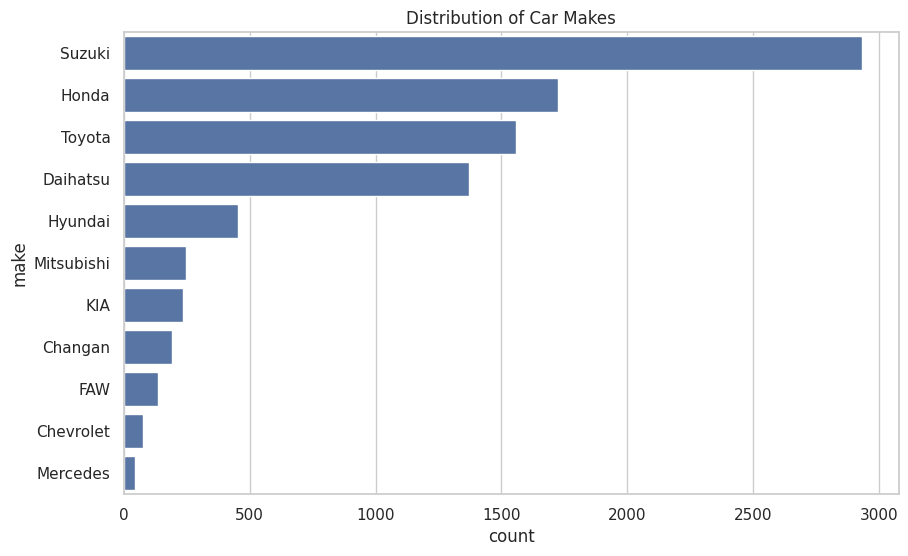

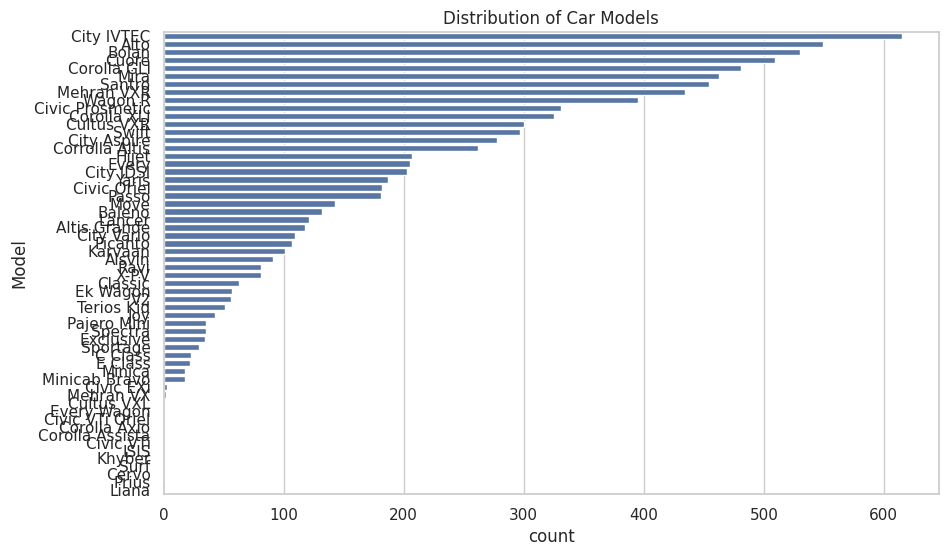

Error: Neither 'fuel_type' nor 'Fuel Type' column found in the dataset.


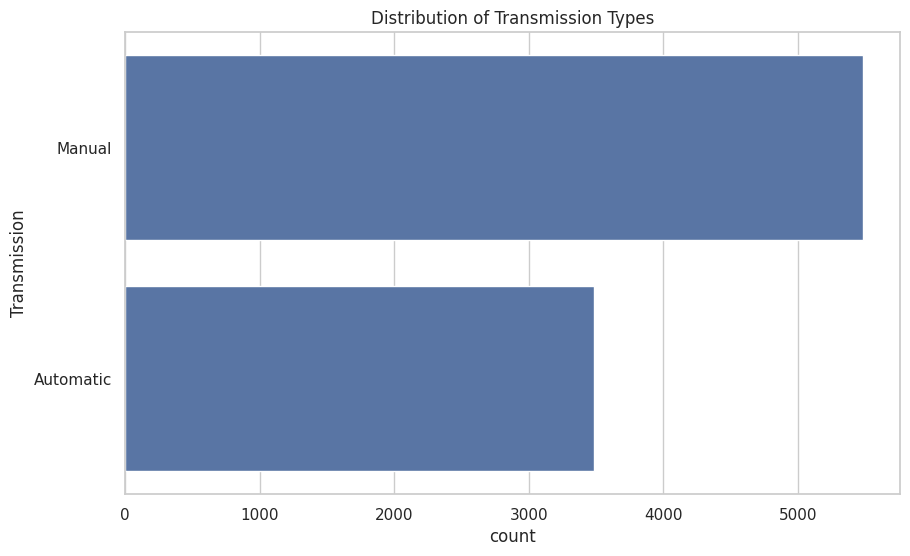

Error: No valid owner type column found in the dataset.
Error: No valid seller type column found in the dataset.
Column 'Price' renamed to 'price'


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

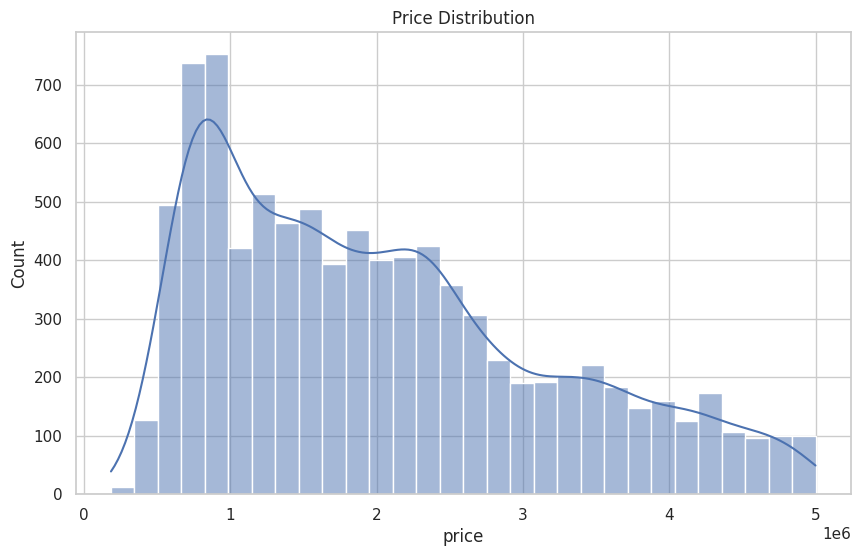

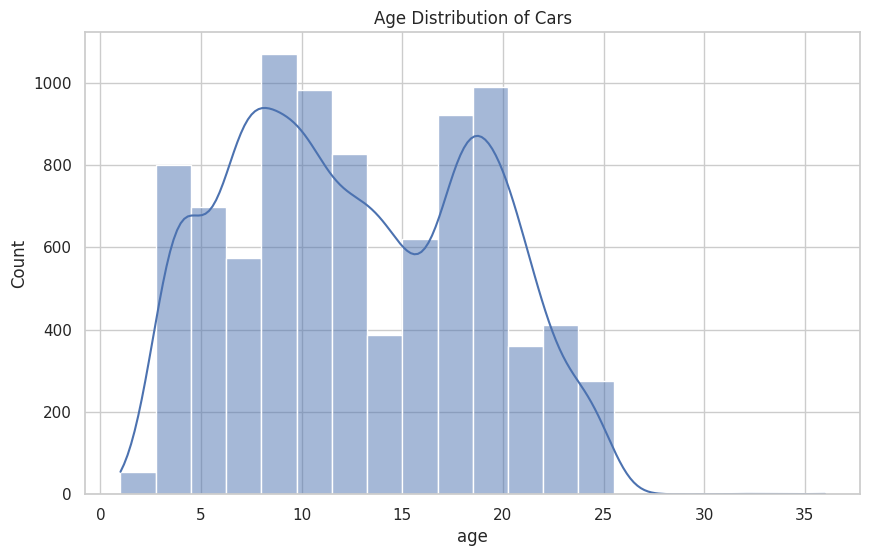

Error: 'km_driven' or 'KM Driven' column not found in the dataset.


<Figure size 1000x600 with 0 Axes>

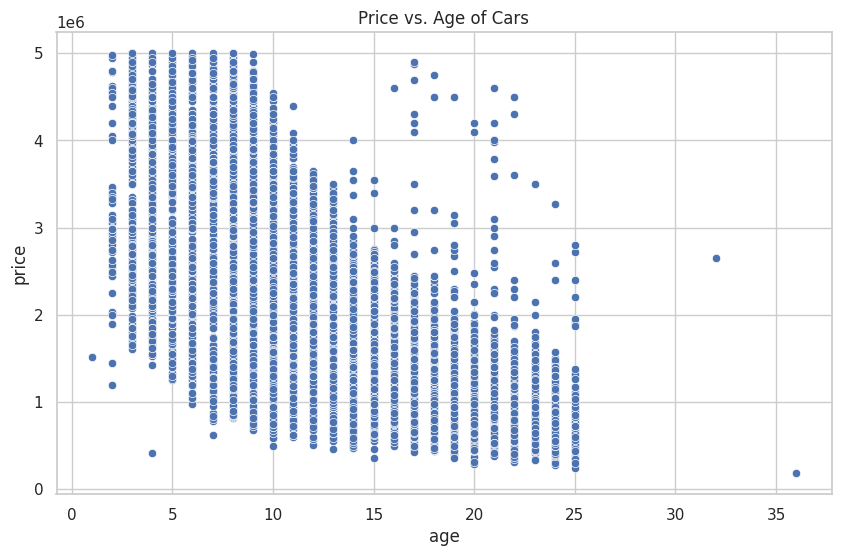

Error: Neither 'km_driven' nor 'KM Driven' column found in the dataset.


<Figure size 1000x600 with 0 Axes>

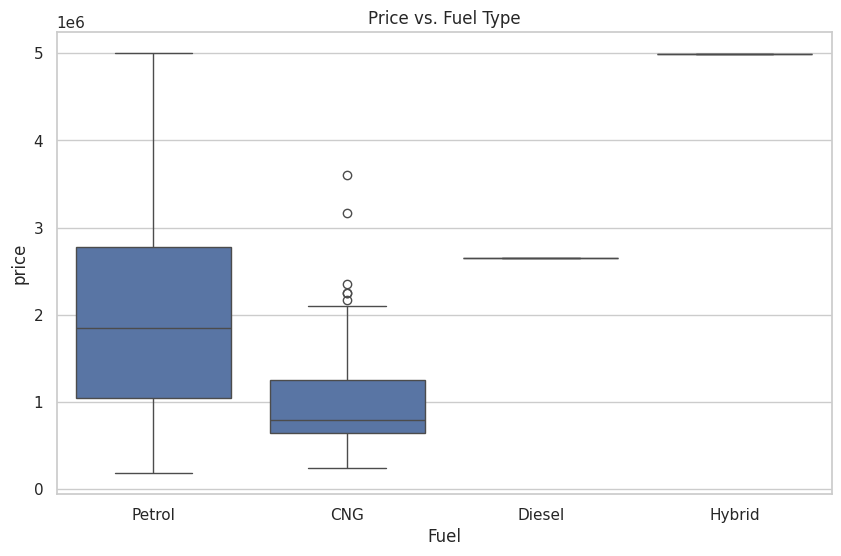

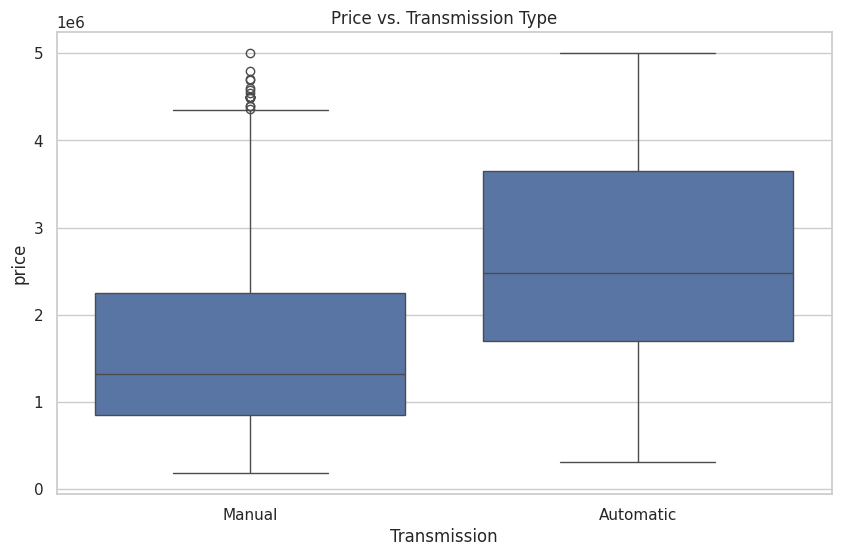

Error: No valid owner type column found in the dataset.
Error: No valid seller type column found in the dataset.
Error: No valid owner type column found in the dataset.
Error: No valid seller type column found in the dataset.
Error: No valid seller type column found in the dataset.


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [15]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Basic Data Information
print(f"Shape of the dataset: {cars_data.shape}")
print(cars_data.describe(include='all'))
print(cars_data.isnull().sum())

# ----> Check if 'make' is in the columns and rename if necessary <----
if 'make' not in cars_data.columns:
    # Assuming 'Make' is the correct column name, rename it to 'make'
    cars_data = cars_data.rename(columns={'Make': 'make'})
    print("Column 'Make' renamed to 'make'")

# Distribution of car makes
plt.figure(figsize=(10, 6))
sns.countplot(y='make', data=cars_data, order=cars_data['make'].value_counts().index)
plt.title('Distribution of Car Makes')
plt.show()

# Distribution of car models
# Check if 'model' exists, if not try 'Model'
model_column = 'model' if 'model' in cars_data.columns else 'Model'
plt.figure(figsize=(10, 6))
sns.countplot(y=model_column, data=cars_data, order=cars_data[model_column].value_counts().index)
plt.title('Distribution of Car Models')
plt.show()

# Distribution of fuel types
# Check if 'fuel_type' or 'Fuel Type' exists, otherwise print an error
fuel_column = None
for potential_fuel_column in ['fuel_type', 'Fuel Type']:  # Check both possibilities
    if potential_fuel_column in cars_data.columns:
        fuel_column = potential_fuel_column
        break  # Exit the loop if found

if fuel_column is not None:  # Proceed if a fuel column was found
    plt.figure(figsize=(10, 6))
    sns.countplot(y=fuel_column, data=cars_data, order=cars_data[fuel_column].value_counts().index)
    plt.title('Distribution of Fuel Types')
    plt.show()
else:
    print("Error: Neither 'fuel_type' nor 'Fuel Type' column found in the dataset.")

# Distribution of transmission types
# Check if 'transmission' or 'Transmission' exists in the DataFrame
transmission_column = 'transmission' if 'transmission' in cars_data.columns else ('Transmission' if 'Transmission' in cars_data.columns else None)

if transmission_column:  # If the column is found
    plt.figure(figsize=(10, 6))
    sns.countplot(y=transmission_column, data=cars_data, order=cars_data[transmission_column].value_counts().index)
    plt.title('Distribution of Transmission Types')
    plt.show()
else:
    print("Error: Neither 'transmission' nor 'Transmission' column found in the dataset.")

# Distribution of owner types
plt.figure(figsize=(10, 6))
# Check if 'owner_type' or 'Owner Type' exists, if not, try 'Owner_Type'
owner_column = None
for potential_owner_column in ['owner_type', 'Owner Type', 'Owner_Type']:
    if potential_owner_column in cars_data.columns:
        owner_column = potential_owner_column
        break

if owner_column:
    sns.countplot(y=owner_column, data=cars_data, order=cars_data[owner_column].value_counts().index)
    plt.title('Distribution of Owner Types')
    plt.show()
else:
    print("Error: No valid owner type column found in the dataset.")

# Distribution of seller types
plt.figure(figsize=(10, 6))
# Check if 'seller_type' exists, if not try 'Seller_Type' or 'Seller Type'
seller_column = None
for potential_seller_column in ['seller_type', 'Seller_Type', 'Seller Type']:
    if potential_seller_column in cars_data.columns:
        seller_column = potential_seller_column
        break

if seller_column:
    sns.countplot(y=seller_column, data=cars_data, order=cars_data[seller_column].value_counts().index)
    plt.title('Distribution of Seller Types')
    plt.show()
else:
    print("Error: No valid seller type column found in the dataset.")


# Price distribution
if 'price' not in cars_data.columns:
    if 'Price' in cars_data.columns:  # Check for 'Price' with uppercase 'P'
        cars_data = cars_data.rename(columns={'Price': 'price'})
        print("Column 'Price' renamed to 'price'")
    # Add other potential column name variations here if necessary
    else:
        print("Error: 'price' column not found. Check your CSV file and column names.")

plt.figure(figsize=(10, 6))
sns.histplot(cars_data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.show()

# Age distribution of cars
plt.figure(figsize=(10, 6))
sns.histplot(cars_data['age'], bins=20, kde=True)
plt.title('Age Distribution of Cars')
plt.show()

# Kilometers driven distribution
plt.figure(figsize=(10, 6))

# Check if 'km_driven' exists, if not try 'KM Driven'
km_driven_column = 'km_driven' if 'km_driven' in cars_data.columns else ('KM Driven' if 'KM Driven' in cars_data.columns else None)

if km_driven_column:
    sns.histplot(cars_data[km_driven_column], bins=30, kde=True)
    plt.title('Kilometers Driven Distribution')
    plt.show()
else:
    print("Error: 'km_driven' or 'KM Driven' column not found in the dataset.")

# Price vs. Age of cars
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='price', data=cars_data)
plt.title('Price vs. Age of Cars')
plt.show()

# Price vs. Kilometers driven
plt.figure(figsize=(10, 6))
# Check if 'km_driven' exists, if not try 'KM Driven'
# If neither is found, print an error message
km_driven_column = 'km_driven' if 'km_driven' in cars_data.columns else ('KM Driven' if 'KM Driven' in cars_data.columns else None)

if km_driven_column:  # If a valid column name was found
    sns.scatterplot(x=km_driven_column, y='price', data=cars_data)  # Use the valid column name
    plt.title('Price vs. Kilometers Driven')
    plt.show()
else:
    print("Error: Neither 'km_driven' nor 'KM Driven' column found in the dataset.")

# Price vs. Fuel type
plt.figure(figsize=(10, 6))

# Check if 'fuel_type' or 'Fuel Type' exists, otherwise print an error
fuel_column = None
for potential_fuel_column in ['fuel_type', 'Fuel Type', 'Fuel']:  # Check 'Fuel' as well
    if potential_fuel_column in cars_data.columns:
        fuel_column = potential_fuel_column
        break  # Exit the loop if found

if fuel_column is not None:  # Proceed if a fuel column was found
    sns.boxplot(x=fuel_column, y='price', data=cars_data)  # Use fuel_column
    plt.title('Price vs. Fuel Type')
    plt.show()
else:
    print("Error: No valid fuel type column found in the dataset.")

# Price vs. Transmission type
plt.figure(figsize=(10, 6))
# Use transmission_column, which was previously determined
sns.boxplot(x=transmission_column, y='price', data=cars_data)
plt.title('Price vs. Transmission Type')
plt.show()

# Price vs. Owner type
plt.figure(figsize=(10, 6))
# Check if owner_column was found, if not, try other variations
if owner_column is None:
    for potential_owner_column in ['owner_type', 'Owner Type', 'Owner_Type']:
        if potential_owner_column in cars_data.columns:
            owner_column = potential_owner_column
            break
if owner_column:
    sns.boxplot(x=owner_column, y='price', data=cars_data)
    plt.title('Price vs. Owner Type')
    plt.show()
else:
    print("Error: No valid owner type column found in the dataset.")

# Price vs. Seller type
plt.figure(figsize=(10, 6))
# Check if seller_column was found, if not, try other variations
if seller_column is None:
    for potential_seller_column in ['seller_type', 'Seller_Type', 'Seller Type']:
        if potential_seller_column in cars_data.columns:
            seller_column = potential_seller_column
            break
if seller_column:
    sns.boxplot(x=seller_column, y='price', data=cars_data)
    plt.title('Price vs. Seller Type')
    plt.show()
else:
    print("Error: No valid seller type column found in the dataset.")

# Price vs. Owner type
plt.figure(figsize=(10, 6))
# Check if a valid owner column was previously identified, if not try common variations
owner_column = owner_column or next((col for col in ['owner_type', 'Owner Type', 'Owner_Type'] if col in cars_data.columns), None)

if owner_column:  # If a valid owner type column is found
    sns.boxplot(x=owner_column, y='price', data=cars_data)  # Use the identified column
    plt.title('Price vs. Owner Type')
    plt.show()
else:
    print("Error: No valid owner type column found in the dataset.")

# Price vs. Seller type
plt.figure(figsize=(10, 6))
# Similar check for seller type column
seller_column = seller_column or next((col for col in ['seller_type', 'Seller_Type', 'Seller Type'] if col in cars_data.columns), None)

if seller_column:  # If a valid seller type column is found
    sns.boxplot(x=seller_column, y='price', data=cars_data)  # Use the identified column
    plt.title('Price vs. Seller Type')
    plt.show()
else:
    print("Error: No valid seller type column found in the dataset.")

# Price vs. Seller type
plt.figure(figsize=(10, 6))
# Check if seller_column was found, if not, try other variations, then 'Seller Type'
if seller_column is None:
    for potential_seller_column in ['seller_type', 'Seller_Type', 'Seller Type']:
        if potential_seller_column in cars_data.columns:
            seller_column = potential_seller_column
            break
    # If still not found, check for 'Seller Type' without the space
    else:
        if 'Seller_Type' in cars_data.columns:
            seller_column = 'Seller_Type'

# If a valid column name is found, use it for the boxplot
if seller_column:
    sns.boxplot(x=seller_column, y='price', data=cars_data)
    plt.title('Price vs. Seller Type')
    plt.show()
else:
    print("Error: No valid seller type column found in the dataset.")

In [16]:
# Import necessary libraries for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np # Import numpy for hstack

# One-hot encoding for categorical features
encoder = OneHotEncoder(handle_unknown='ignore')

# Get actual column names from the DataFrame
categorical_cols = ['make']  # Start with 'make' which is likely correct
for col in ['model', 'Model', 'fuel_type', 'Fuel Type', 'Fuel', 'transmission', 'Transmission', 'owner_type', 'Owner Type', 'Owner_Type', 'seller_type', 'Seller_Type', 'Seller Type']:
    if col in cars_data.columns:
        categorical_cols.append(col)

# Fit and transform using the identified columns
encoded_features = encoder.fit_transform(cars_data[categorical_cols])

# Scaling numerical features
scaler = StandardScaler()

# Check if 'km_driven' exists, if not, try 'KM Driven'
km_driven_column = 'km_driven' if 'km_driven' in cars_data.columns else ('KM Driven' if 'KM Driven' in cars_data.columns else None)

# If neither is found, raise an error


# Use the correct column name for scaling
scaled_features = scaler.fit_transform(cars_data[['age', 'price']])

# Combine encoded and scaled features
final_features = np.hstack([encoded_features.toarray(), scaled_features])

# Create a DataFrame for the final features
# Use get_feature_names_out with input_features=categorical_cols
# Convert the NumPy array returned by get_feature_names_out to a list
# before concatenating with ['age', 'price']
final_features_df = pd.DataFrame(final_features,
                                 columns=encoder.get_feature_names_out(input_features=categorical_cols).tolist() + ['age','price'])

# Display the first few rows of the final features DataFrame
print(final_features_df.head())



   make_Changan  make_Chevrolet  make_Daihatsu  make_FAW  make_Honda  \
0           0.0             0.0            0.0       0.0         0.0   
1           0.0             0.0            0.0       0.0         1.0   
2           0.0             0.0            0.0       0.0         1.0   
3           0.0             0.0            1.0       0.0         0.0   
4           0.0             0.0            0.0       0.0         1.0   

   make_Hyundai  make_KIA  make_Mercedes  make_Mitsubishi  make_Suzuki  ...  \
0           0.0       0.0            0.0              0.0          0.0  ...   
1           0.0       0.0            0.0              0.0          0.0  ...   
2           0.0       0.0            0.0              0.0          0.0  ...   
3           0.0       0.0            0.0              0.0          0.0  ...   
4           0.0       0.0            0.0              0.0          0.0  ...   

   Model_X-PV  Model_Yaris  Fuel_CNG  Fuel_Diesel  Fuel_Hybrid  Fuel_Petrol  \
0         0.0

In [17]:
# Import necessary library for similarity calculation
from sklearn.metrics.pairwise import cosine_similarity

# Cosine Similarity Calculation
similarity_matrix = cosine_similarity(final_features)

# Display the similarity matrix shape
print(f"Shape of the similarity matrix: {similarity_matrix.shape}")

Shape of the similarity matrix: (8973, 8973)


In [23]:
# Function to display recommendations with color coding
from IPython.display import display
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder here


def display_recommendations(recommendations):
    # Check if 'owner_type' exists, if not try 'Owner Type' or 'Owner_Type'
    owner_column = None
    for potential_owner_column in ['owner_type', 'Owner Type', 'Owner_Type']:
        if potential_owner_column in recommendations.columns:
            owner_column = potential_owner_column
            break

    if owner_column:  # If a valid column name was found
        owner_types = recommendations[owner_column].unique()
        for owner_type in owner_types:
            display(recommendations[recommendations[owner_column] == owner_type][[
                'make', 'model', 'transmission', 'Year', 'km_driven', 'fuel_type', 'seller_type', 'price'
            ]].sort_values(by='price', ascending=False).head(5).style.background_gradient(cmap="spring"))
    else:
        print("Warning: No valid owner type column found in recommendations. Skipping color coding by owner type.")

# Modified Recommendation Logic
def recommend_vehicle(user_input, cars_data, encoder, scaler, final_features, n_recommendations=15):  # Pass cars_data
    # ... (rest of the function remains the same)
    # Initialize the encoder inside the function
    # encoder = OneHotEncoder(handle_unknown='ignore')

    #encoder.fit(cars_data[['make', 'model', 'fuel_type', 'transmission']]) # Fit to your data - no need to fit again
    user_encoded = encoder.transform([[
        user_input['make'], user_input['model'], user_input['fuel_type'],
        user_input['transmission']
    ]]).toarray()

    user_scaled_data = scaler.transform([[user_input['age'], user_input['price']]])
    user_scaled_data = np.nan_to_num(user_scaled_data, nan=0)  # Handle potential NaNs

    # Combine encoded and scaled features
    user_features = np.hstack([user_encoded, user_scaled_data])

    # Calculate similarity and get recommendations
    similarity_scores = cosine_similarity(user_features, final_features)
    recommendations = cars_data.iloc[similarity_scores.argsort()[0, -n_recommendations:]]

    # Display recommendations with color coding
    display_recommendations(recommendations)

    return recommendations

# Example usage
user_input_example = {
    'make': 'Toyota',
    'model': 'Corolla',
    'fuel_type': 'Petrol',
    'transmission': 'Automatic',
    'owner_type': 'First Owner',
    'seller_type': 'Individual',
    'price': 1500000,
    'km_driven': 50000,
    'age': 2025 - 2018
}
# Access the encoder and scaler from the global scope
# and pass cars_data as an argument to recommend_vehicle

# Assuming 'cars_data' is already defined globally
recommendations_example = recommend_vehicle(user_input_example, cars_data, encoder, scaler, final_features)  # Pass cars_data
print(recommendations_example)

# Add the bar plot for seller type vs km driven
plt.figure(figsize=(10, 6))

# Check if 'Owner_Type' exists in cars_data columns before using it
owner_column = 'Owner_Type' if 'Owner_Type' in cars_data.columns else None
# If 'Owner_Type' doesn't exist, provide a message and skip the plot
if owner_column:
    # Check if 'Seller_Type' exists in cars_data columns before using it
    seller_column = 'Seller_Type' if 'Seller_Type' in cars_data.columns else None
    # If 'Seller_Type' doesn't exist, provide a message and skip the plot
    if seller_column:
        sns.barplot(x=cars_data[owner_column], y=cars_data["km_driven"], hue=cars_data[seller_column], palette="spring")
        plt.xticks(rotation=80)
        plt.title("Seller Type vs. KM Driven Comparison")
        plt.show()
    else:
        print("Error: 'Seller_Type' column not found in the dataset. Skipping bar plot.")
else:
    print("Error: 'Owner_Type' column not found in the dataset. Skipping bar plot.")

                                               Car Name    make        Model  \
684               Toyota passo model 2013 register 2016  Toyota        Passo   
7545                                              Passo  Toyota        Passo   
3792                             Toyota Passo 2009/2012  Toyota        Passo   
3057            HOME USED TOYOTA PASSO (TOTAL IN SEALS)  Toyota        Passo   
4815                                    Passo 2010+2012  Toyota        Passo   
2775                           Toyota Passo (2006-2012)  Toyota        Passo   
2150                             TOYOTA PASSO NEW SHAPE  Toyota        Passo   
4222  Toyota Passo Beige Automatic 2014/ Reg 2017 1....  Toyota        Passo   
993                                   Toyota passo 9/13  Toyota        Passo   
8034               Toyota Passo 2007/2013 Daihatsu Boon  Toyota        Passo   
4395                                  Toyota passo hanu  Toyota        Passo   
6148                                    

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

In [ ]:
# Recommendation Logic
def recommend_vehicle(user_input, n_recommendations=15):
   # encoder = OneHotEncoder(handle_unknown='ignore')

    user_encoded = encoder.transform([[
        user_input['make'], user_input['model'], user_input['fuel_type'],
        user_input['transmission']
    ]]).toarray()

     # Scale numerical features
     # Include 'km_driven' in scaling
    # Correct the features used for scaling to match the training data
    user_scaled_data = scaler.transform([[user_input['age'], user_input['price']]])  # Removed 'km_driven'
    user_scaled_data = np.nan_to_num(user_scaled_data, nan=0)  # Handle potential NaNs


    # Combine encoded and scaled features
    user_features = np.hstack([user_encoded, user_scaled_data])

  # Calculate similarity and get recommendations
    similarity_scores = cosine_similarity(user_features, final_features)
    recommendations = cars_data.iloc[similarity_scores.argsort()[0, -n_recommendations:]]
    return recommendations

# Example usage
user_input_example = {
    'make': 'Toyota',
    'model': 'Corolla',
    'fuel_type': 'Petrol',
    'transmission': 'Automatic',
    'owner_type': 'First Owner',
    'seller_type': 'Individual',
    'price': 1500000,
    'km_driven': 50000,
    'age': 2025 - 2018
}

recommendations_example = recommend_vehicle(user_input_example)
print(recommendations_example)

                                               Car Name    make        Model  \
3592              Toyota passo model 2013 register 2016  Toyota        Passo   
7332                                              Passo  Toyota        Passo   
5098                             Toyota Passo 2009/2012  Toyota        Passo   
4061            HOME USED TOYOTA PASSO (TOTAL IN SEALS)  Toyota        Passo   
6088                                    Passo 2010+2012  Toyota        Passo   
1782                           Toyota Passo (2006-2012)  Toyota        Passo   
2576                             TOYOTA PASSO NEW SHAPE  Toyota        Passo   
1114  Toyota Passo Beige Automatic 2014/ Reg 2017 1....  Toyota        Passo   
5958                                  Toyota passo 9/13  Toyota        Passo   
5964               Toyota Passo 2007/2013 Daihatsu Boon  Toyota        Passo   
4695                                  Toyota passo hanu  Toyota        Passo   
8902                                    

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# @title
# Import necessary library for widgets
import ipywidgets as widgets
from IPython.display import display

# User Interface
make_dropdown = widgets.Dropdown(options=cars_data['make'].unique(), description='Make:')

# Check if 'model' exists, if not try 'Model'
# This ensures consistency with your visualization code
model_column = 'model' if 'model' in cars_data.columns else 'Model'
model_dropdown = widgets.Dropdown(options=cars_data[model_column].unique(), description='Model:')

# Check for potential fuel type column names
fuel_column = None
for potential_fuel_column in ['fuel_type', 'Fuel Type', 'Fuel']:
    if potential_fuel_column in cars_data.columns:
        fuel_column = potential_fuel_column
        break

# If a fuel type column is found, use it for the dropdown
if fuel_column:
    fuel_dropdown = widgets.Dropdown(options=cars_data[fuel_column].unique(), description='Fuel:')
else:
    # Handle the case where no fuel type column is found
    raise KeyError("No valid fuel type column found in the dataset. Please check your data.")

# Check for potential owner type column names
owner_column = None
for potential_owner_column in ['owner_type', 'Owner Type', 'Owner_Type']:
    if potential_owner_column in cars_data.columns:
        owner_column = potential_owner_column
        break

# If an owner type column is found, use it for the dropdown
if owner_column:
    owner_dropdown = widgets.Dropdown(options=cars_data[owner_column].unique(), description='Owner:')
else:
    # Handle the case where no owner type column is found
    owner_dropdown = widgets.Dropdown(options=['None'], description='Owner:') # Create a dummy dropdown if owner column not found
    print("Warning: No valid owner type column found. Owner dropdown disabled.")


# Check for potential seller type column names
seller_column = None
for potential_seller_column in ['seller_type', 'Seller_Type', 'Seller Type']:
    if potential_seller_column in cars_data.columns:
        seller_column = potential_seller_column
        break

# If a seller type column is found, use it for the dropdown
if seller_column:
    seller_dropdown = widgets.Dropdown(options=cars_data[seller_column].unique(), description='Seller:')
else:
    # Handle the case where no seller type column is found
    seller_dropdown = widgets.Dropdown(options=['None'], description='Seller:') # Create a dummy dropdown if seller column not found
    print("Warning: No valid seller type column found. Seller dropdown disabled.")


# Replace 'transmission' with 'Transmission' to access the correct column
transmission_dropdown = widgets.Dropdown(options=cars_data['Transmission'].unique(), description='Transmission:')
price_slider = widgets.IntRangeSlider(min=0, max=5000000, step=50000, description='Price:')
km_slider = widgets.IntRangeSlider(min=0, max=200000, step=5000, description='KM Driven:')
def on_button_click(_):
    user_input = {
        'make': make_dropdown.value,
        # Use the identified model column here as well
        'model': model_dropdown.value,
        'fuel_type': fuel_dropdown.value,
        'owner_type': owner_dropdown.value,
        'seller_type': seller_dropdown.value,
        'transmission': transmission_dropdown.value,
        'price': sum(price_slider.value) / 2,
        'km_driven': sum(km_slider.value) / 2,
        # Instead of trying to convert the model to an integer,
        # you should probably use a different approach to estimate the age.
        # For example, you could have a separate input for the year or
        # try to extract the year from the model string if it's present.
        # For now, I'm setting the age to a default value of 5.
        'age': 5  # Replace with a more appropriate age estimation
    }
    recommendations = recommend_vehicle(user_input)
    display(recommendations)

button = widgets.Button(description="Get Recommendations")
button.on_click(on_button_click)

# Display the widgets
display(make_dropdown, model_dropdown, fuel_dropdown, owner_dropdown, seller_dropdown, transmission_dropdown, price_slider, km_slider, button)


Dropdown(description='Make:', options=('Suzuki', 'Daihatsu', 'Changan', 'Toyota', 'KIA', 'Honda', 'Mitsubishi'…

Dropdown(description='Model:', options=('Alto', 'Swift', 'Mira', 'Alsvin', 'Corolla GLI', 'Cultus VXR', 'Sport…

Dropdown(description='Fuel:', options=('Petrol', 'CNG', 'Hybrid', 'Diesel'), value='Petrol')

Dropdown(description='Owner:', options=('None',), value='None')

Dropdown(description='Seller:', options=('None',), value='None')

Dropdown(description='Transmission:', options=('Manual', 'Automatic'), value='Manual')

IntRangeSlider(value=(1250000, 3750000), description='Price:', max=5000000, step=50000)

IntRangeSlider(value=(50000, 150000), description='KM Driven:', max=200000, step=5000)

Button(description='Get Recommendations', style=ButtonStyle())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Car Name,make,Model,Year,KM's driven,price,Fuel,Registration city,Car documents,Assembly,...,Power Mirrors,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear speakers,Steering Switches,Sun Roof,USB and Auxillary Cable
4097,Alto VXR good condition car,Suzuki,Alto,2022,11000,2475000,Petrol,Punjab,Original,Local,...,0,0,0,0,0,0,0,0,0,0
5509,Suzuki Alto VXR,Suzuki,Alto,2022,25000,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
7480,suzuki alto total genuine,Suzuki,Alto,2022,44000,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
8608,ALTO VXR 2022,Suzuki,Alto,2022,19750,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
4425,Suzuki Alto vxr 2022 model 10/10 condition,Suzuki,Alto,2022,23500,2495000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
3060,SUZUKI ALTO VXR,Suzuki,Alto,2022,24000,2500000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0
2777,2022 modal vxr isb No total original,Suzuki,Alto,2022,25000,2500000,Petrol,Islamabad,Original,Local,...,0,0,1,0,0,0,0,0,0,0
1941,Suzuki Alto VXR 2022,Suzuki,Alto,2022,40000,2500000,Petrol,Lahore,Original,Local,...,0,0,0,0,0,0,0,0,0,0
3934,Alto Vxr 2022 model,Suzuki,Alto,2022,21200,2510000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0
2468,Alto Vxr total orignal,Suzuki,Alto,2022,40500,2515000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Car Name,make,Model,Year,KM's driven,price,Fuel,Registration city,Car documents,Assembly,...,Power Mirrors,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear speakers,Steering Switches,Sun Roof,USB and Auxillary Cable
4097,Alto VXR good condition car,Suzuki,Alto,2022,11000,2475000,Petrol,Punjab,Original,Local,...,0,0,0,0,0,0,0,0,0,0
5509,Suzuki Alto VXR,Suzuki,Alto,2022,25000,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
7480,suzuki alto total genuine,Suzuki,Alto,2022,44000,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
8608,ALTO VXR 2022,Suzuki,Alto,2022,19750,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
4425,Suzuki Alto vxr 2022 model 10/10 condition,Suzuki,Alto,2022,23500,2495000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
3060,SUZUKI ALTO VXR,Suzuki,Alto,2022,24000,2500000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0
2777,2022 modal vxr isb No total original,Suzuki,Alto,2022,25000,2500000,Petrol,Islamabad,Original,Local,...,0,0,1,0,0,0,0,0,0,0
1941,Suzuki Alto VXR 2022,Suzuki,Alto,2022,40000,2500000,Petrol,Lahore,Original,Local,...,0,0,0,0,0,0,0,0,0,0
3934,Alto Vxr 2022 model,Suzuki,Alto,2022,21200,2510000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0
2468,Alto Vxr total orignal,Suzuki,Alto,2022,40500,2515000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Car Name,make,Model,Year,KM's driven,price,Fuel,Registration city,Car documents,Assembly,...,Power Mirrors,Power Steering,Power Windows,Rear AC Vents,Rear Camera,Rear Seat Entertainment,Rear speakers,Steering Switches,Sun Roof,USB and Auxillary Cable
1785,Suzuki Alto Vxr as good as new,Suzuki,Alto,2022,12500,2475000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0
8608,ALTO VXR 2022,Suzuki,Alto,2022,19750,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
7480,suzuki alto total genuine,Suzuki,Alto,2022,44000,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
5509,Suzuki Alto VXR,Suzuki,Alto,2022,25000,2490000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
4425,Suzuki Alto vxr 2022 model 10/10 condition,Suzuki,Alto,2022,23500,2495000,Petrol,Islamabad,Original,Local,...,0,0,0,0,0,0,0,0,0,0
1941,Suzuki Alto VXR 2022,Suzuki,Alto,2022,40000,2500000,Petrol,Lahore,Original,Local,...,0,0,0,0,0,0,0,0,0,0
3060,SUZUKI ALTO VXR,Suzuki,Alto,2022,24000,2500000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0
2777,2022 modal vxr isb No total original,Suzuki,Alto,2022,25000,2500000,Petrol,Islamabad,Original,Local,...,0,0,1,0,0,0,0,0,0,0
3934,Alto Vxr 2022 model,Suzuki,Alto,2022,21200,2510000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0
2468,Alto Vxr total orignal,Suzuki,Alto,2022,40500,2515000,Petrol,Karachi,Original,Local,...,0,0,0,0,0,0,0,0,0,0
